In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
monthly = dd.read_csv('/Users/riyamhatre/Downloads/historical_data_2009Q1/historical_data_time_2009Q1.txt', sep='|', header = None,dtype={23: 'object',
       24: 'object',
       28: 'object',
       29: 'object',
       3: 'object',
       7: 'object'})

In [3]:
monthly.columns = ["loan_sequence_number", "monthly_reporting_period", "current_actual_upb",
                                   "current_loan_delinquency_status", "loan_age",
                                   "remaining_months_to_maturity",
                                   "repurchase_flag", "modification_flag", "zero_balance_code",
                                   "zero_balance_effective_date", "current_interest_rate",
                                   "current_deferred_upb",
                                   "due_date_last_installment",
                                   "insurance_recoveries", "net_sales_proceeds", "non_insurance_recoveries",
                                   "expenses",
                                   "legal_costs", "maintenance_costs", "taxes_and_insurance", "misc_expenses",
                                   "actual_loss", "modification_cost", "step_modification_flag",
                                   "deferred_payment_modification", "loan_to_value", "zero_balance_removal_upb",
                                   "delinquent_accrued_interest","del_disaster","borrower_assistance","month_mod_cost","interest_bearing"]

In [4]:
monthly.shape[0].compute()

34150513

In [5]:
summary = monthly.describe()
print("Summary Statistics:")
summary.compute()

Summary Statistics:


,monthly_reporting_period,current_actual_upb,loan_age,remaining_months_to_maturity,repurchase_flag,zero_balance_code,zero_balance_effective_date,current_interest_rate,current_deferred_upb,due_date_last_installment,...,maintenance_costs,taxes_and_insurance,misc_expenses,actual_loss,modification_cost,loan_to_value,zero_balance_removal_upb,delinquent_accrued_interest,month_mod_cost,interest_bearing
count,3.415051e+07,3.415051e+07,3.415051e+07,3.415051e+07,1141.000000,593110.000000,593109.000000,3.415051e+07,3.415051e+07,47615.000000,...,5379.000000,5379.000000,5379.000000,5410.000000,4011.000000,4.042721e+06,5.931100e+05,6543.000000,251304.000000,3.415051e+07
mean,2.012337e+05,1.792234e+05,4.208316e+01,2.865958e+02,201188.929010,1.209103,201280.206557,4.907218e+00,3.915063e+01,201888.561231,...,-5732.103612,-7059.068210,-938.392389,-67886.694651,8222.330132,1.453618e+02,1.976966e+05,13302.523917,131.298271,1.791842e+05
std,3.225698e+02,1.078897e+05,3.819135e+01,7.821757e+01,181.832281,3.598379,285.346969,3.749404e-01,1.526580e+03,355.886338,...,9201.310395,12867.582522,2349.803295,64966.979413,15748.831269,3.044590e+02,1.132996e+05,18436.119250,258.691078,1.078661e+05
min,2.009010e+05,0.000000e+00,0.000000e+00,-8.000000e+00,200904.000000,1.000000,200901.000000,2.000000e+00,0.000000e+00,200901.000000,...,-103648.880000,-269438.080000,-77988.440000,-735370.080000,-25035.310000,1.000000e+00,1.000000e-02,-1446.430000,-737.800000,0.000000e+00
25%,2.010090e+05,1.216138e+05,1.700000e+01,2.940000e+02,201107.000000,1.000000,201111.000000,4.750000e+00,0.000000e+00,201911.000000,...,-3906.970000,-5484.797500,-731.462500,-70089.780000,602.925000,3.000000e+01,1.447927e+05,4046.882500,2.890000,1.216002e+05
50%,2.012040e+05,1.890568e+05,3.600000e+01,3.330000e+02,201206.250000,1.000000,201211.000000,4.875000e+00,0.000000e+00,202010.000000,...,-365.390000,-2420.100000,-290.000000,-36951.395000,4743.685000,4.400000e+01,2.163284e+05,10591.080000,114.625000,1.890541e+05
75%,2.015040e+05,3.120000e+05,7.100000e+01,3.500000e+02,201406.000000,1.000000,201504.000000,5.375000e+00,0.000000e+00,202109.000000,...,0.000000,0.000000,-145.000000,-9865.530000,19651.800000,6.700000e+01,3.391482e+05,21715.430000,294.925000,3.119829e+05
max,2.023030e+05,1.078000e+06,1.700000e+02,5.490000e+02,202007.000000,96.000000,202303.000000,7.875000e+00,1.970322e+05,203905.000000,...,500.000000,182580.940000,19626.290000,86720.730000,373262.340000,9.990000e+02,1.015495e+06,287715.400000,50779.680000,1.078000e+06


In [6]:
month_sub = monthly.sample(frac=0.1, random_state=42).compute() 

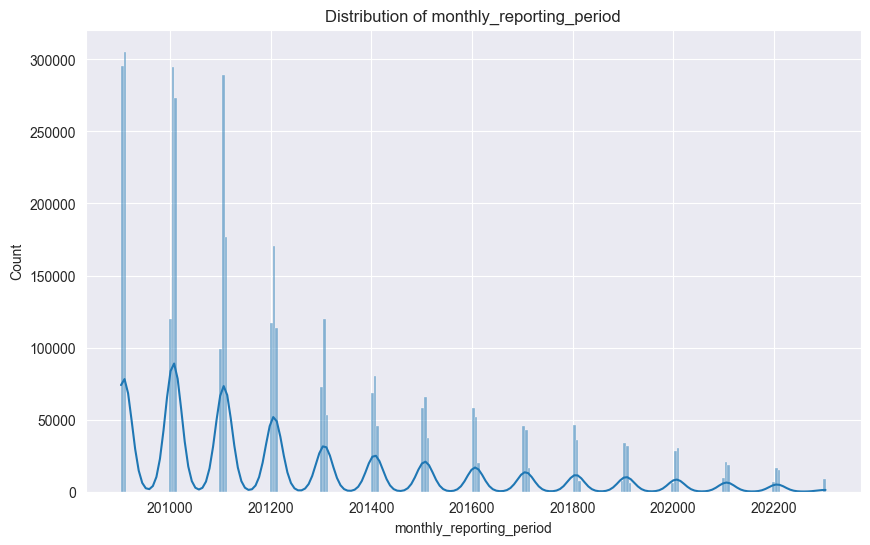

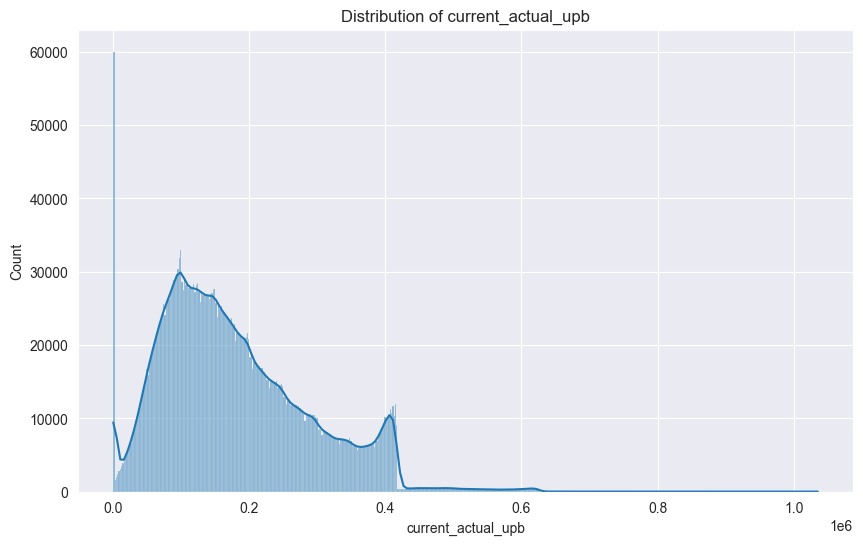

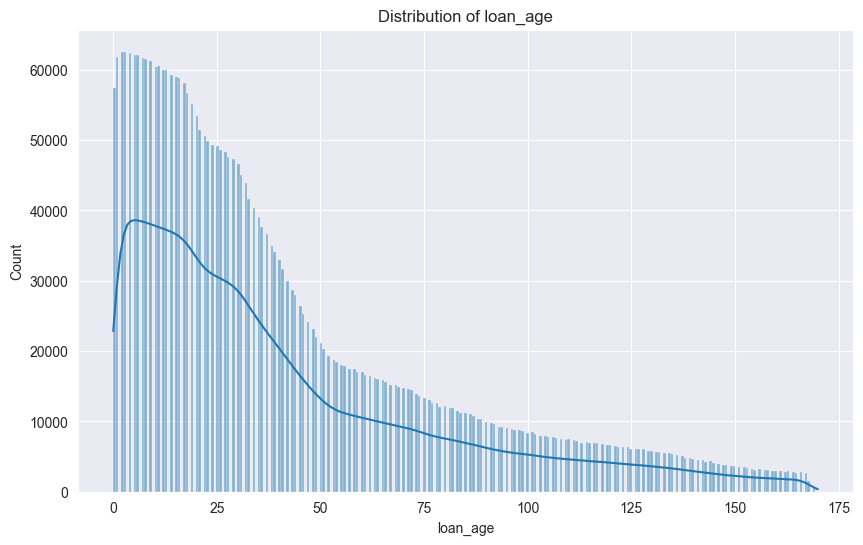

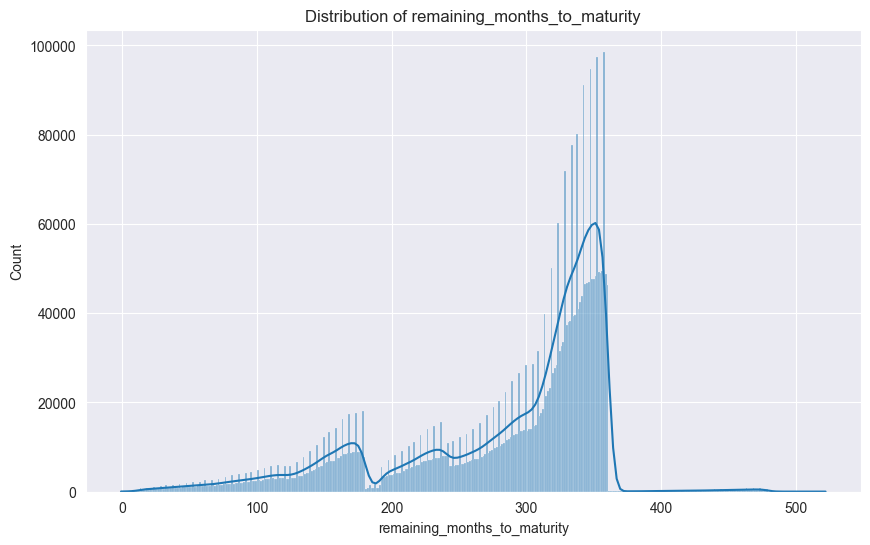

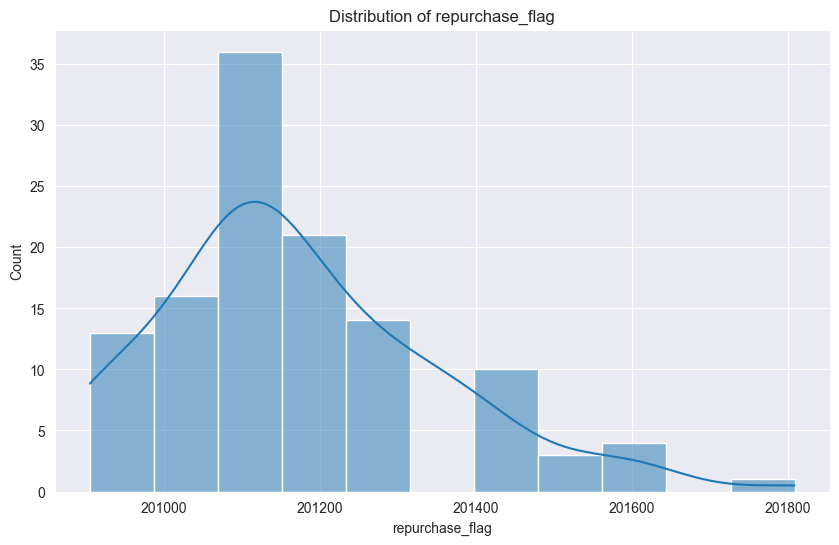

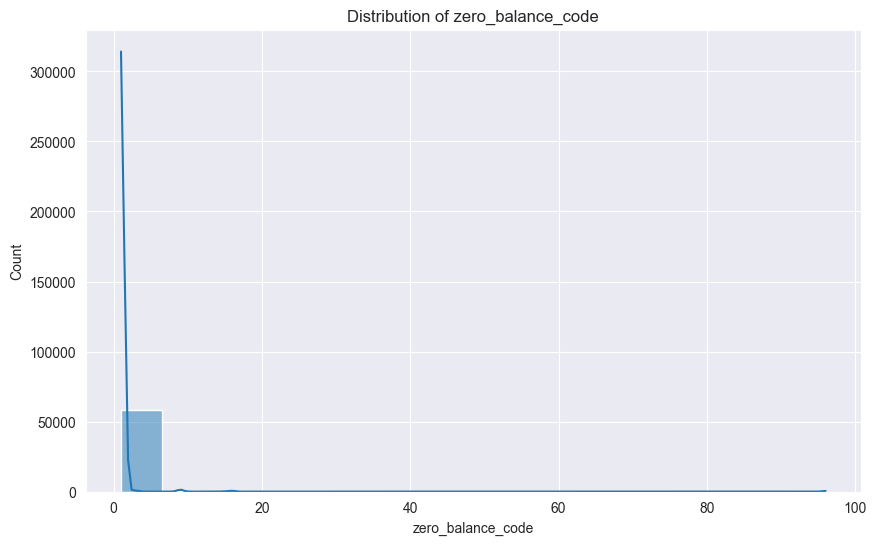

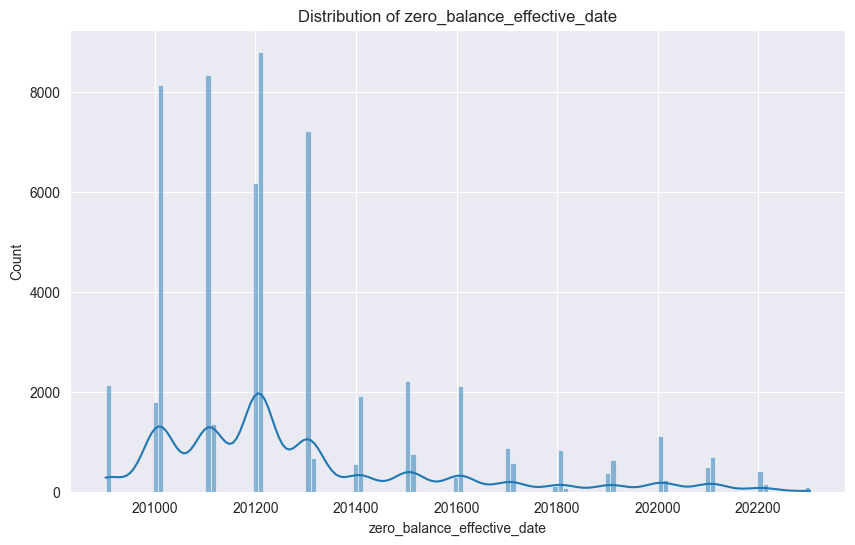

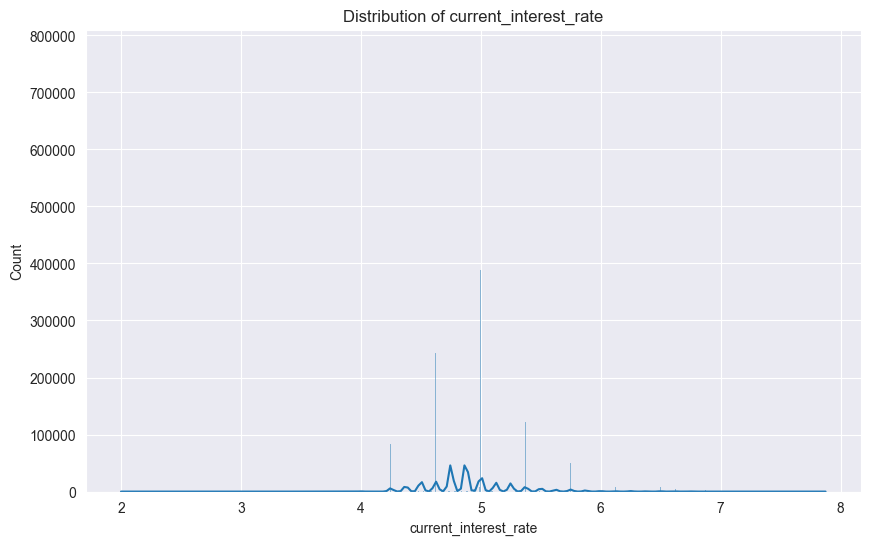

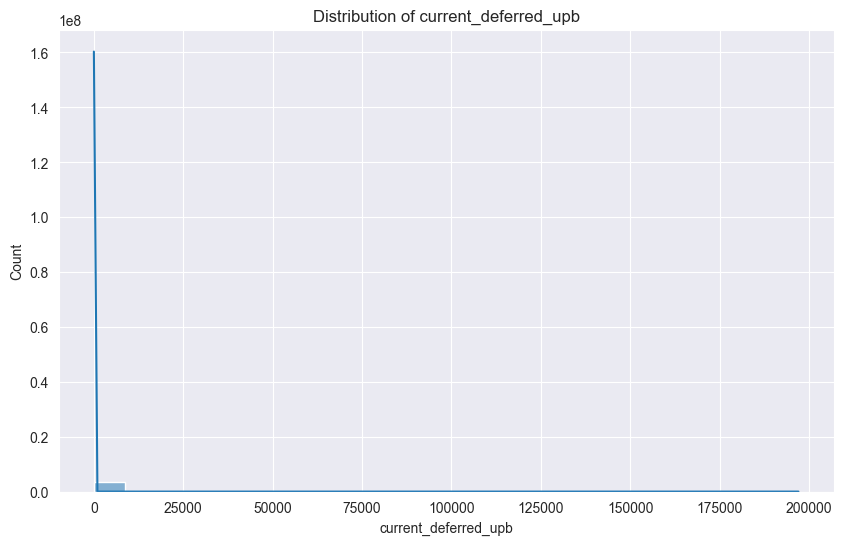

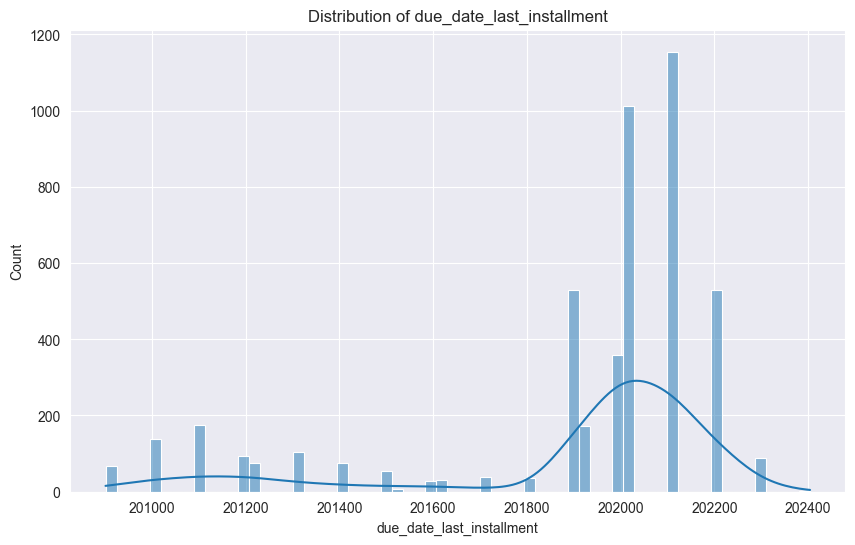

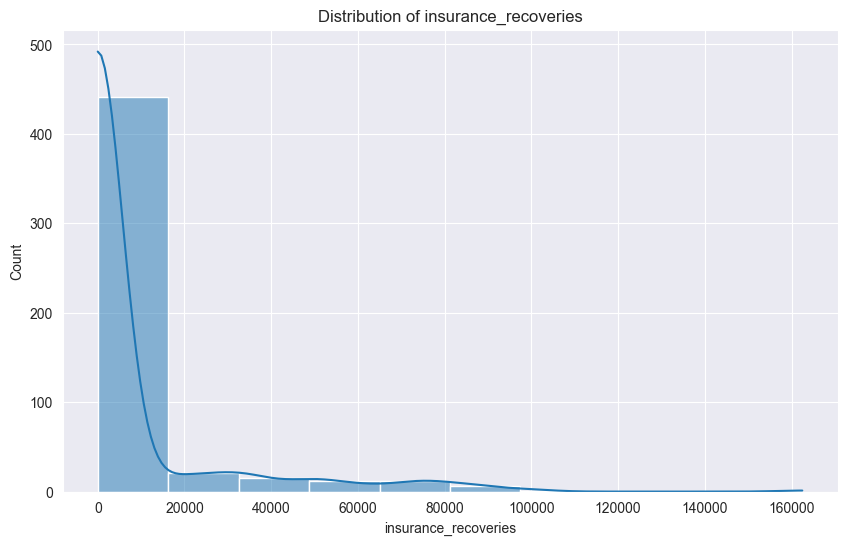

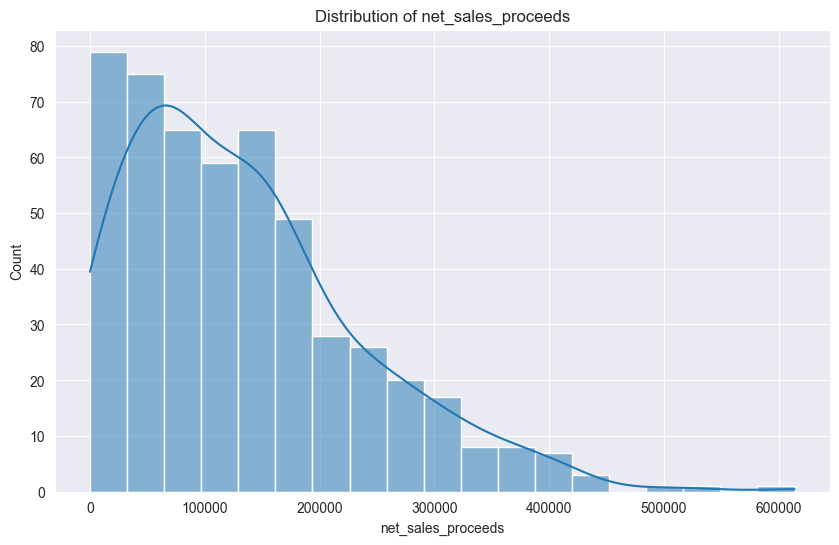

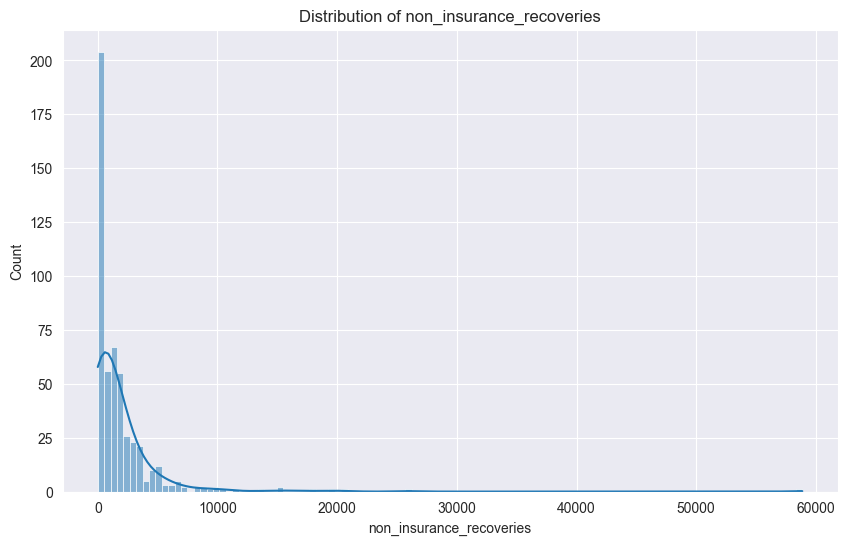

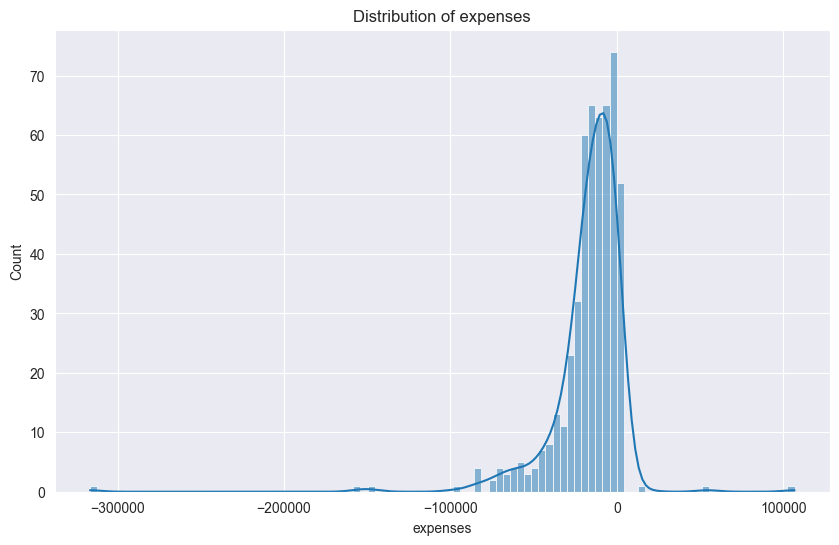

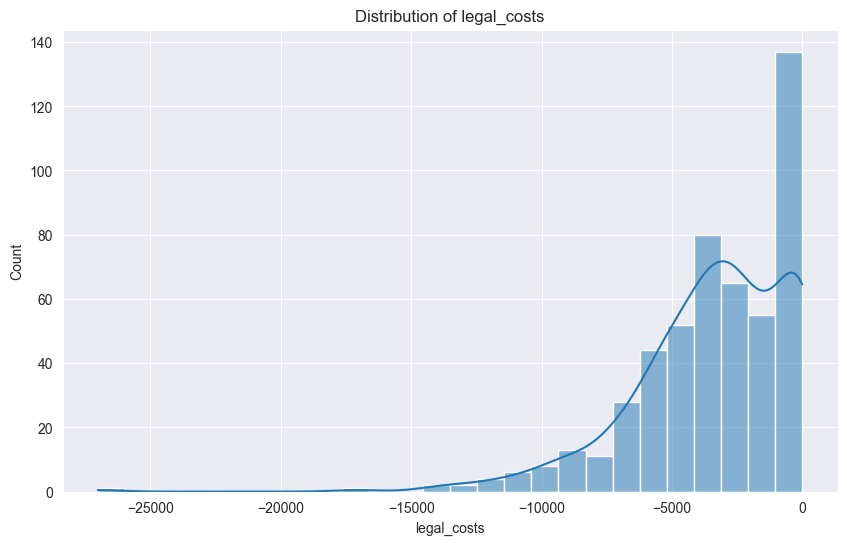

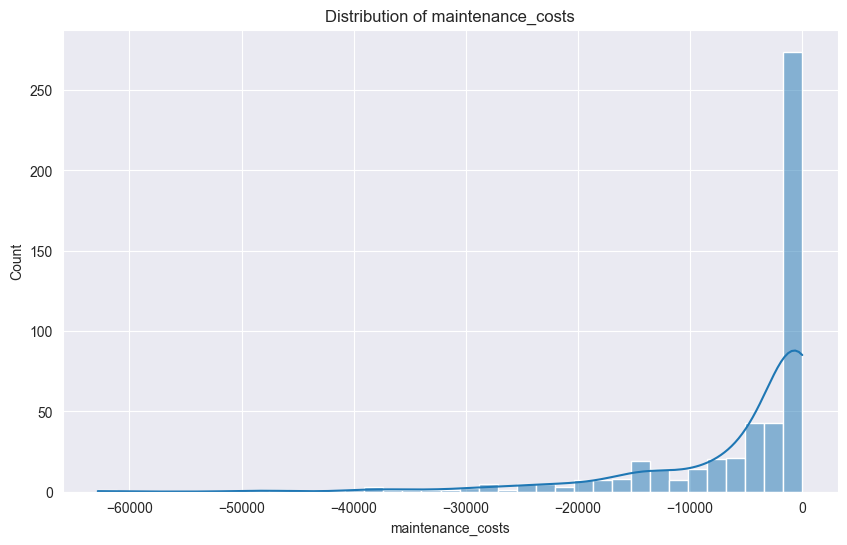

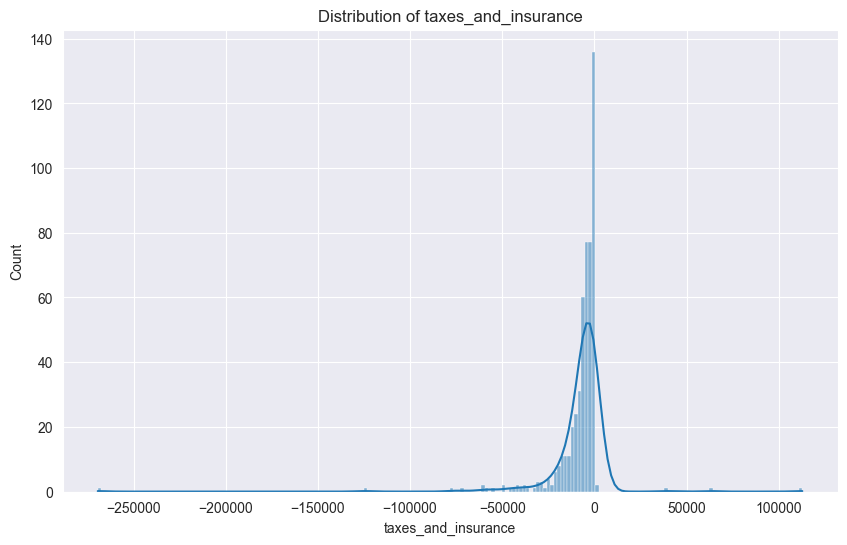

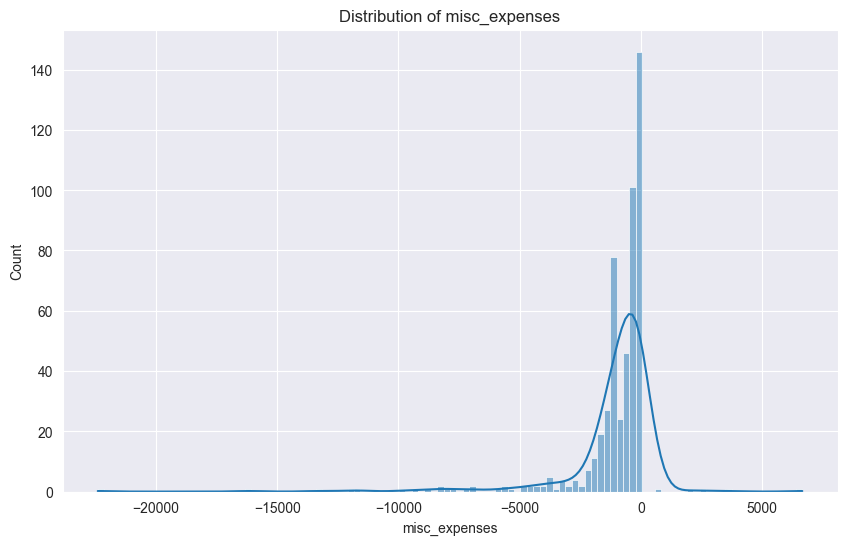

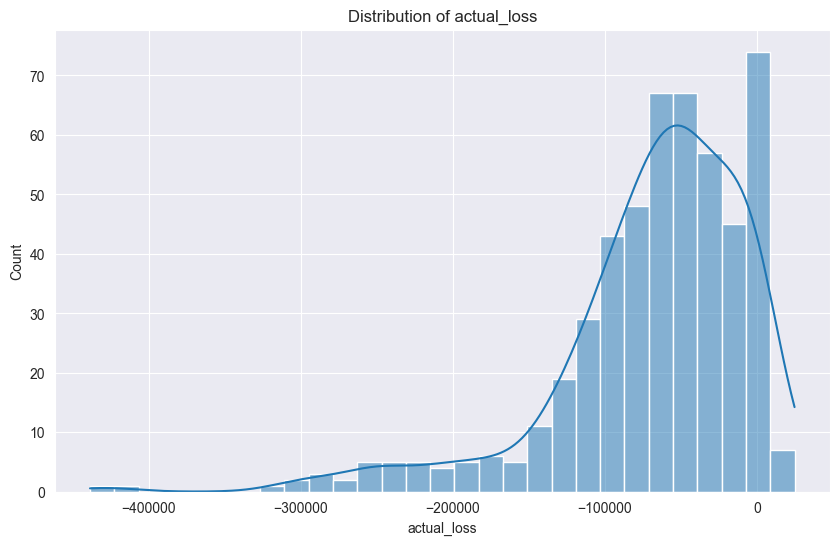

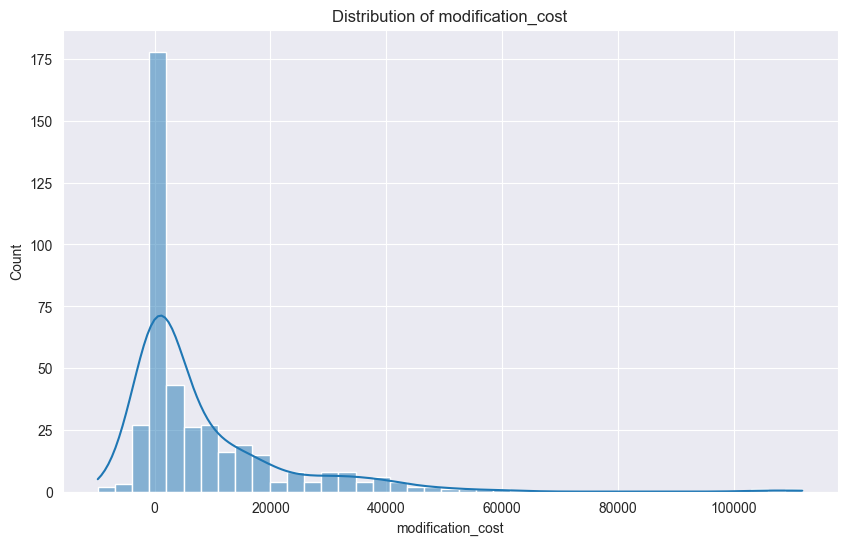

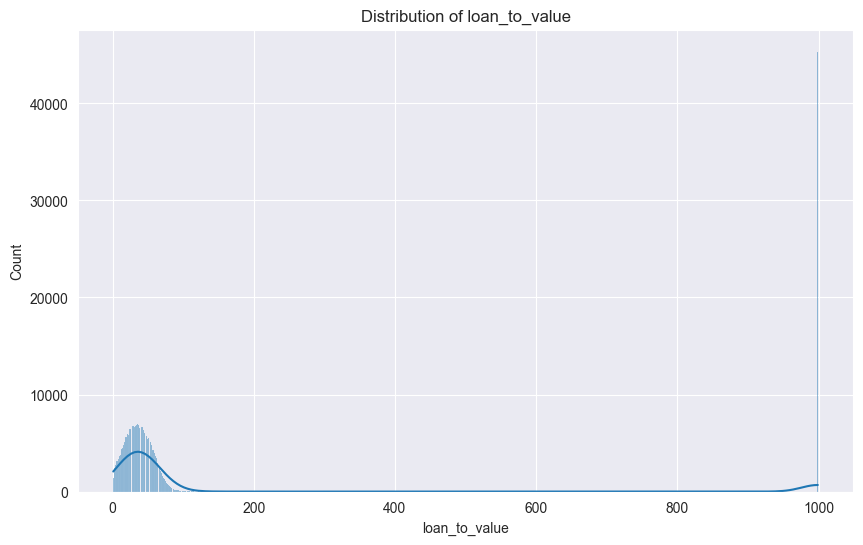

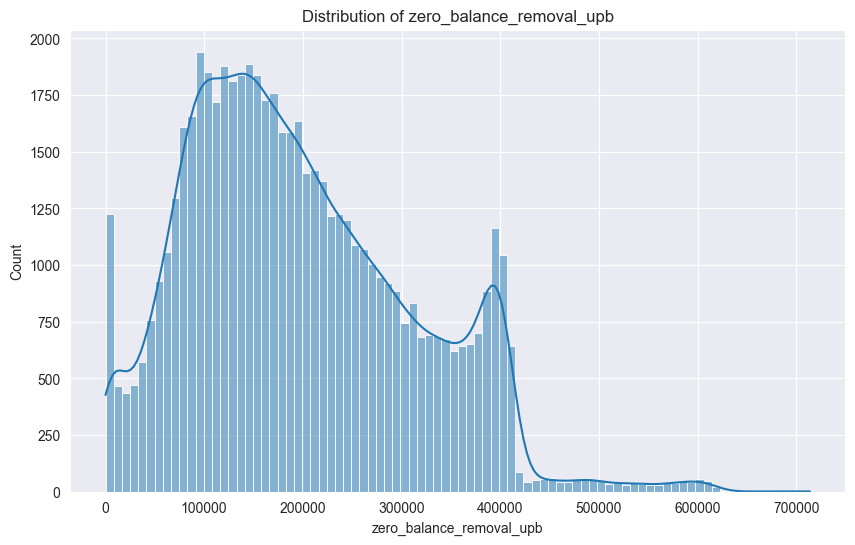

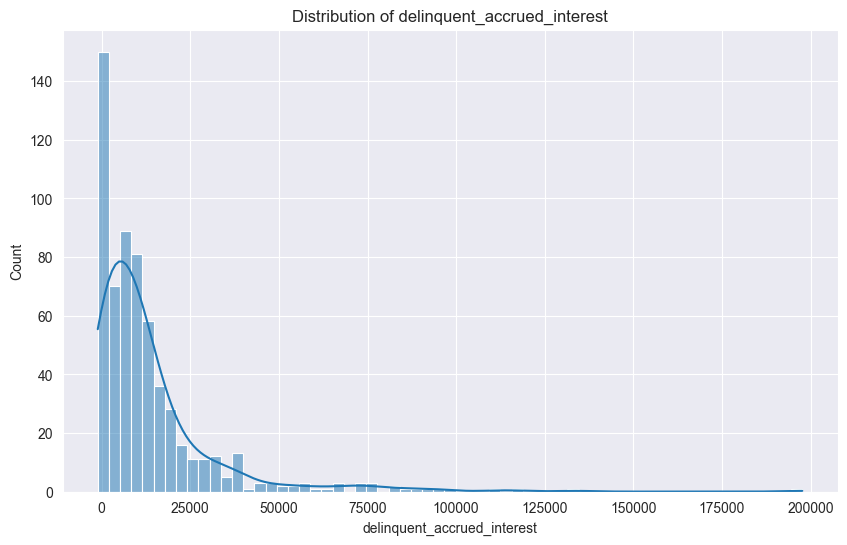

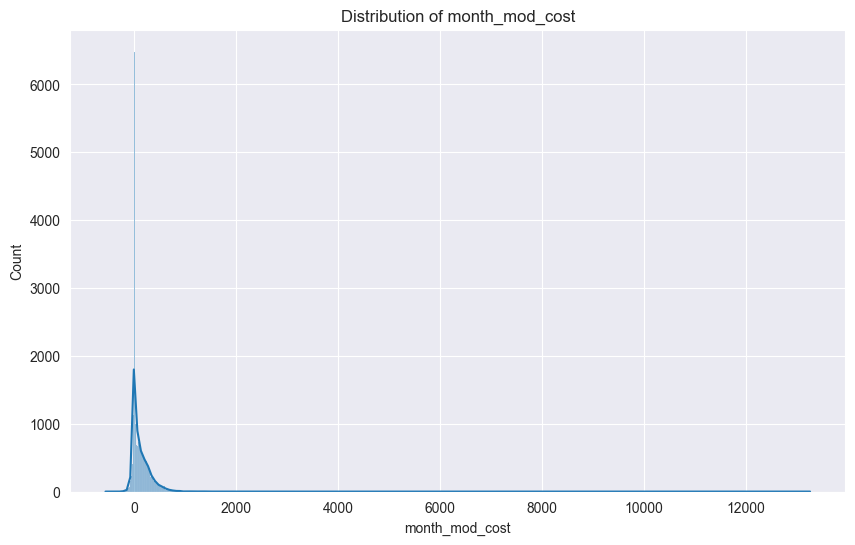

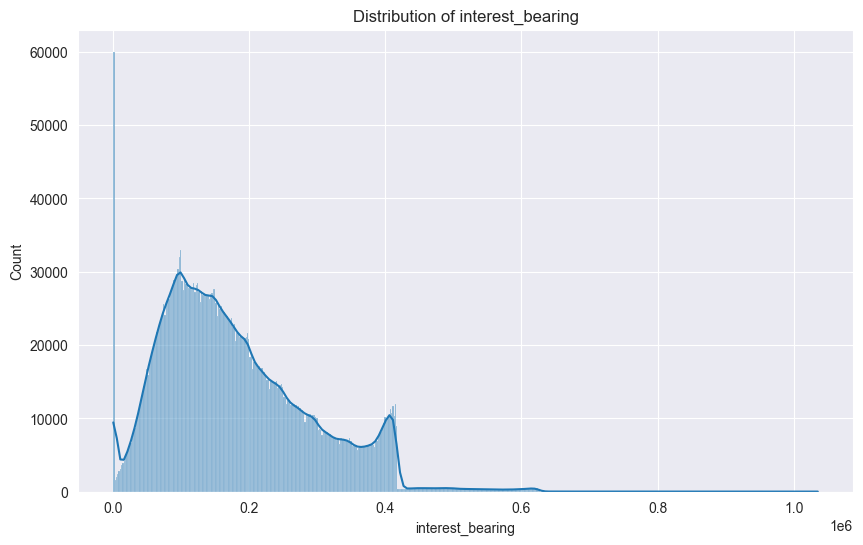

In [7]:
for column in month_sub.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(month_sub[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [8]:
nans = month_sub.isna().sum()/ month_sub.shape[0]
nans

loan_sequence_number               0.000000
monthly_reporting_period           0.000000
current_actual_upb                 0.000000
current_loan_delinquency_status    0.000000
loan_age                           0.000000
remaining_months_to_maturity       0.000000
repurchase_flag                    0.999965
modification_flag                  0.993444
zero_balance_code                  0.982708
zero_balance_effective_date        0.982708
current_interest_rate              0.000000
current_deferred_upb               0.000000
due_date_last_installment          0.998605
insurance_recoveries               0.999851
net_sales_proceeds                 0.999850
non_insurance_recoveries           0.999851
expenses                           0.999851
legal_costs                        0.999851
maintenance_costs                  0.999851
taxes_and_insurance                0.999851
misc_expenses                      0.999851
actual_loss                        0.999850
modification_cost               

In [9]:
nan_cols = []
for i in range(len(nans)):
    if nans[i] >0:
        nan_cols.append(nans.index[i])

In [10]:
cat_nulls = ['repurchase_flag',
 'modification_flag',
 'zero_balance_code',
 'zero_balance_effective_date',
 'due_date_last_installment',
 'step_modification_flag',
 'deferred_payment_modification',
 'loan_to_value',
 'del_disaster',
 'borrower_assistance']
num_nulls = ['insurance_recoveries',
 'net_sales_proceeds',
 'non_insurance_recoveries',
'legal_costs',
 'maintenance_costs',
 'taxes_and_insurance',
'misc_expenses',
 'actual_loss',
 'modification_cost',
'zero_balance_removal_upb',
 'delinquent_accrued_interest',
     'month_mod_cost']
    

In [11]:
missingness_df = pd.DataFrame()
col1 = []
col2 = []
dependent = []
from scipy.stats import chi2_contingency
for i in cat_nulls: 
    for j in nan_cols:
        observed = pd.crosstab(month_sub[i].isnull(), month_sub[j].isnull())
        chi2, p, dof, expected = chi2_contingency(observed)
        if p < 0.05:
            dependent.append(True)
        else:
            dependent.append(False)
        col1.append(i)
        col2.append(j)

In [12]:
missingness_df['column_1'] = col1
missingness_df['column_2'] = col2
missingness_df['dependent'] = dependent

In [13]:
missingness_df.head()

,column_1,column_2,dependent
0,repurchase_flag,repurchase_flag,True
1,repurchase_flag,modification_flag,True
2,repurchase_flag,zero_balance_code,True
3,repurchase_flag,zero_balance_effective_date,True
4,repurchase_flag,due_date_last_installment,True


In [14]:
for index, row in missingness_df.iterrows():
    if row['column_1'] == row['column_2']:
        missingness_df.drop(index, inplace = True)

<Axes: >

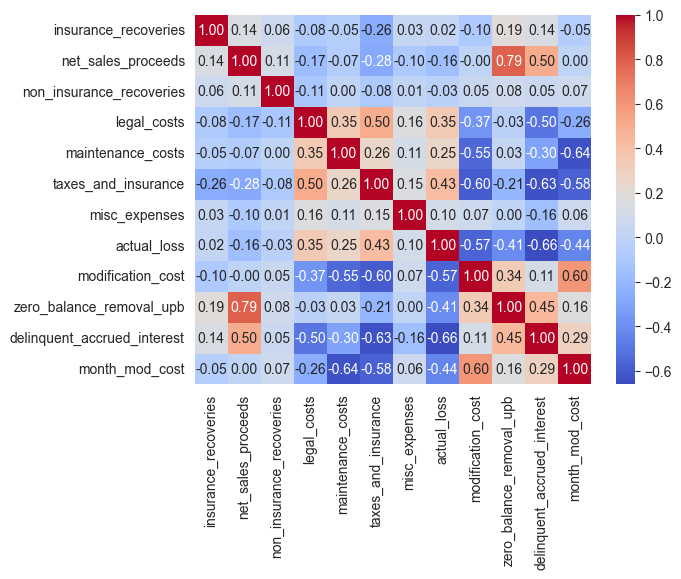

In [15]:
sns.heatmap(month_sub[num_nulls].corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [16]:
correlations = month_sub[num_nulls].corrwith(month_sub['net_sales_proceeds'])

mean_imputed = month_sub[num_nulls].fillna(month_sub[num_nulls].mean())
mean_imputed_correlations = mean_imputed.corrwith(mean_imputed['net_sales_proceeds'])

# Check if there's a change in correlations after imputation
correlation_change = mean_imputed_correlations - correlations
print(correlation_change)

insurance_recoveries          -1.085117e-03
net_sales_proceeds            -1.110223e-16
non_insurance_recoveries      -8.493411e-04
legal_costs                    1.314011e-03
maintenance_costs              5.438136e-04
taxes_and_insurance            2.170727e-03
misc_expenses                  7.487079e-04
actual_loss                    1.387779e-16
modification_cost              9.508452e-03
zero_balance_removal_upb      -7.204744e-01
delinquent_accrued_interest   -2.478970e-02
month_mod_cost                 6.307829e-03
dtype: float64
